In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset into panda DataFrame
df = pd.read_csv("german_credit_card.csv")
df.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
# Get columns from dataset 
# X = Duration of Credit, Payment Status of Previous Credit
X = np.array(df.iloc[:,[2,3]])
# y = Creditability
y = np.array(df.iloc[:,0])

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20)

In [4]:
# Use KNN learning model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)*100
print('Accuracy of model is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy of model is equal to 70.0 %.


In [5]:
# Perform k-fold cross validation
mylist = list(range(1,200,2))
cv_scores = []
for k in mylist:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

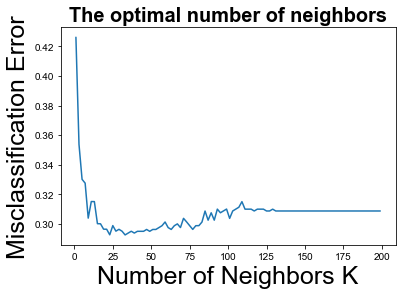

In [6]:
# Plot Misclassification Error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=25)
plt.ylabel('Misclassification Error', fontsize=25)
sns.set_style("whitegrid")
plt.plot(mylist, MSE)
plt.show()

In [7]:
# Re-run using optimum neighbor value
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)*100
print('Accuracy of model is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy of model is equal to 74.5 %.
